<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [32]:
import pandas as pd
import psycopg2

In [33]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [34]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
# обращаемся к агрегатной функции счета

query_3_1 = f'''
select count(id)   
from public.VACANCIES
        '''

In [5]:
df_3_1 = pd.read_sql_query(query_3_1, connection)
df_3_1

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# обращаемся к агрегатной функции счета
query_3_2 = f'''
select count(id)
from public.EMPLOYERS
        '''

In [7]:
df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# обращаемся к агрегатной функции счета
query_3_3 = f'''
select count(id)
from public.AREAS
        '''

In [9]:
df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# обращаемся к агрегатной функции счета
query_3_4 = f'''
select count(id)
from public.INDUSTRIES
        '''

In [11]:
df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,294


***

Выводы по предварительному анализу:

Вакансий в два раза больше, чем кол-во работодателей. Из этого можно сделать вывод, что в среднем один работодатель предоставляет по 2 вакансии.
Также можно отметит большое количество сфер деятельности и регионов.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1 = f'''
select
a.name,
count(v.id) as cnt
from public.VACANCIES v join public.AREAS  a on v.area_id=a.id   -- соеденияем таблицы
group by a.name                                    -- группируем по названию города 
order by cnt desc                                  -- сортируем по кол-ву вакансий
limit 5                                            -- берем первые 5 строк
        '''

In [13]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
query_4_2 = f'''
select
count(v.id)                                                 -- агрегатную функцию счета
from public.VACANCIES v
where (salary_from is not null) or (salary_to is not null)  -- ставим условие, чтобы одно из двух полей было заполнено

        '''

In [15]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3 = f'''
select
ROUND (avg(v.salary_from)) as salary_from,  --делаем округление среднего значения
ROUND (avg(v.salary_to)) as salary_to       --делаем округление среднего значения
from public.VACANCIES v


        '''

In [17]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,salary_from,salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4 = f'''
select
schedule,
employment,
count(id)                       -- агрегатную функцию счета
from public.VACANCIES v
group by schedule,employment  --группируем по двум значениям
order by count(id) desc     -- сортируем по убыванию

        '''

In [19]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса

query_4_5 = f'''
select
experience,
count(id)                  -- агрегатную функцию счета
from public.VACANCIES v
group by experience  --группируем по одному значению
order by count(id)     -- сортируем по возрастанию

        '''

In [21]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


Выводы по детальному анализу вакансий:

Самое большое количество вакансий в Москве.
Главный компонтент- заработная плата, указано только в половине вакансий.
Больше всего вакансий, где тип рабочего графика (полный день) и типа трудоустройства (полная занятость).
Также можно замитить, что много вакансий (около 7800), где тип рабочего графика (удалённая работа) и типа трудоустройства (полная занятость). Из этого можно сделать вывод, что удаленная работа



***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [22]:
# текст запроса
query_5_1 = f'''
(select
e.name,                                    
count(v.id)
from public.VACANCIES v join public.EMPLOYERS  e on v.employer_id = e.id  -- соеденяем таблицы 
group by e.name                                             -- группируем по имени
order by count(v.id) desc                                   -- сортируем по кол-ву
limit 1 )                                                   -- выводим только первую строку

union              -- объединяем два запроса

(select
e.name,
count(v.id)
from public.VACANCIES v join public.EMPLOYERS  e on v.employer_id = e.id  -- соеденяем таблицы 
group by e.name                                             -- группируем по имени
order by count(v.id) desc                                   -- сортируем по кол-ву                                                   -- выводим работодателя, который щанимаем первое место
offset 4 limit 1)                                           -- выводим 5 строку
order by count desc         

        '''

In [23]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,count
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [27]:
# текст запроса
query_5_2 = f'''
select
a.name as "Название_региона",   
count(e.name) as "Количество_работодателей" ,   --используем агрегатную фугкцию счета 
count(v.id) as "Количество_выкансий"            --используем агрегатную фугкцию счета 
from public.AREAS a                    
join public.EMPLOYERS e on a.id = e.area          -- соеденяем таблицы по id
left join public.VACANCIES v on a.id = v.area_id  -- соеденяем таблицы по id
group by a.name                                   -- группируем по названию
having count(v.id)=0                              -- берем те регионы, в котрых нет вакансий
order by count(e.name) desc                       -- сортируем по убыванию

        '''

In [28]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Название_региона,Количество_работодателей,Количество_выкансий
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
181,Удобная,1,0
182,Майна (Ульяновская область),1,0
183,Верхнетуломский,1,0
184,Жаркент,1,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [4]:
# текст запроса
query_5_3 = f'''
select
e.name,
count(DISTINCT v.area_id)          --используем агрегатную функцию счета (уникальных значений)
from public.EMPLOYERS e join public.VACANCIES v on e.id = v.employer_id -- соеденяем таблицы
group by e.name                                      -- групируем по названию
order by count(v.id) desc                            -- сортируем по убыванию

        '''

In [5]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,count
0,Яндекс,181
1,Ростелеком,152
2,Тинькофф,43
3,СБЕР,24
4,Газпром нефть,24
...,...,...
14761,ПСБ Инновации и Инвестиции,1
14762,ПСЗ Янтарь,1
14763,ПСК,1
14764,Псковский завод механических приводов,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [34]:
# текст запроса
query_5_4 = f'''
select
count(*)                                     --используем агрегатную функцию счета 
from public.EMPLOYERS e 
left join public.EMPLOYERS_INDUSTRIES  ei on  ei.employer_id = e.id  -- соеденяем таблицы
where  employer_id  is Null              -- выбираем только тех, у которых не указана сфера

        '''

In [35]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [74]:
# текст запроса
query_5_5 = f'''
select
e.name                                   --используем агрегатную функцию счета (уникальных значений)
from public.EMPLOYERS_INDUSTRIES ei 
join  public.INDUSTRIES i on  ei.industry_id = i.id
RIGHT join public.EMPLOYERS  e on  ei.employer_id = e.id  -- соеденяем таблицы
group by e.id                                             -- групируем по названию
having count(i.id) = 4                                    -- выбираем только, где указано 4 сферы
order by e.name                                           -- сортируем по убыванию
limit 1 offset 2               

        '''

In [75]:
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [4]:
query_5_6 = f'''
select
count(i.name)                                 --используем агрегатную функцию счета 
from public.EMPLOYERS_INDUSTRIES ei 
join  public.INDUSTRIES i on  ei.industry_id = i.id  -- соеденяем таблицы
join  public.EMPLOYERS  e on  ei.employer_id = e.id  -- соеденяем таблицы
where i.name = 'Разработка программного обеспечения'    --выбираем только тех, у кого указана данная сфера

        '''

In [5]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [14]:
# код для получения списка городов-милионников

url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
tables = pd.read_html(url)  #считываем все таблици

big_city = tables[1]        #выбираем ту таблицу, которая нам нам нужна
big_city = big_city.replace({'Город': {'Воронеж[a]': 'Воронеж'}})  #делаем замену
city = tuple(big_city['Город'].values.tolist()) #создаем кортеж
city

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [23]:
# текст запроса
query_5_7 = f'''
(SELECT 
a.name,
count(*)                                     --используем агрегатную функцию счета 
from employers e
join vacancies v on e.id = v.employer_id     -- соеденяем таблицы
join areas a on a.id = v.area_id             -- соеденяем таблицы
WHERE e.name = 'Яндекс' and a.name in {city}  --делаем выборку по значениям 
GROUP BY a.id)                                -- группируем по id
            
UNION ALL   -- объединяем запросы

(SELECT 
'TOTAL',
COUNT (*)                                    --используем агрегатную функцию счета
FROM public.vacancies v
JOIN public.employers e ON e.id = v.employer_id  -- соеденяем таблицы
JOIN public.areas a ON a.id = v.area_id          -- соеденяем таблицы
WHERE e.name = 'Яндекс' and a.name in {city})    --делаем выборку по значениям          
ORDER BY 2                                       --сортируем по возрастанию 


        '''

In [24]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

Выводы по анализу работодателей:

Яндекс занимаем первое место по числу вакансий и количесву регионов (где предоставляет вакансии), это говорит о том, что Яндекс можно считать самой крупной компанией России в IT-секторе.
У большого количества работодателей не указана сфера деятельности, что способствует тому, что при поиске вакансии по сфере, алгоритм не выдаст подходящую вакансию из этого списка.



# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [45]:
# текст запроса
query_6_1 = f'''
select
count(name)                               --используем агрегатную функцию счета 
from public.VACANCIES
where UPPER(name)  LIKE '%ДАНН%' or  UPPER(name)  LIKE  '%DATA%'  -- делаем выборку по названиям приводя их к верхнему регистру и используя поиск по заданному шаблону


        '''

In [46]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [28]:
# текст запроса
query_6_2 = f'''
select
count(*)                                                               --используем агрегатную функцию счета 
FROM public.VACANCIES AS v
WHERE                                                                  -- делаем выборку по заданию приводя названия к нижнему регистру и используя поиск по заданному шаблону
(LOWER(v.name) LIKE '%data%scientist%' 
OR LOWER(v.name) LIKE '%data%science%'
OR LOWER(v.name) LIKE '%исследователь%данных%'
OR LOWER(v.name) LIKE '%machine%learning%'
OR LOWER(v.name) LIKE '%машинн%обучен%'
OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
AND
(LOWER(v.name) LIKE '%junior%'
OR experience = 'Нет опыта'
OR schedule = 'Стажировка')

        '''

In [29]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [87]:
# текст запроса
query_6_3 = f'''
select
count(*)                                                             --используем агрегатную функцию счета 
FROM public.VACANCIES AS v
WHERE                                                                  -- делаем выборку по заданию приводя названия к нижнему регистру  и используя поиск по заданному шаблону
(LOWER(v.name) LIKE '%data%scientist%' 
OR LOWER(v.name) LIKE '%data%science%'
OR LOWER(v.name) LIKE '%исследователь%данных%'
OR LOWER(v.name) LIKE '%machine%learning%'
OR LOWER(v.name) LIKE '%машинн%обучен%'
OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
AND
(LOWER(v.key_skills) LIKE '%sql%'
OR LOWER(v.key_skills) LIKE '%postgres%')

        '''

In [88]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [90]:
# текст запроса
query_6_4 = f'''
select
count(*)                                                             --используем агрегатную функцию счета 
FROM public.VACANCIES AS v
WHERE                                                                  -- делаем выборку по заданию, приводя названия к нижнему регистру  и используя поиск по заданному шаблону
(LOWER(v.name) LIKE '%data%scientist%' 
OR LOWER(v.name) LIKE '%data%science%'
OR LOWER(v.name) LIKE '%исследователь%данных%'
OR LOWER(v.name) LIKE '%machine%learning%'
OR LOWER(v.name) LIKE '%машинн%обучен%'
OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
AND
(LOWER(v.key_skills) LIKE '%python%')


        '''

In [91]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [24]:
# текст запроса
query_6_5 = f'''
select                                                                                    
ROUND( AVG(1+length(key_skills) - length(REPLACE(key_skills, CHR(9), '' )))::numeric, 2 ) as avg_count_skills--используем агрегатную функцию среднего арф. считаем длину 
FROM public.VACANCIES AS v
WHERE                                                                  -- делаем выборку по заданию, приводя названия к нижнему регистру и используя поиск по заданному шаблону
LOWER(v.name) LIKE '%data%scientist%' 
OR LOWER(v.name) LIKE '%data%science%'
OR LOWER(v.name) LIKE '%исследователь%данных%'
OR LOWER(v.name) LIKE '%machine%learning%'
OR LOWER(v.name) LIKE '%машинн%обучен%'
OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'
AND (key_skills IS NOT NULL)
'''

In [25]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,avg_count_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [35]:
# текст запроса
query_6_6 = f'''
select                                                                                    
v.experience ,
round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to))) as avg_salary  -- находим среднюю з/п
FROM public.VACANCIES AS v
WHERE                                                                  -- делаем выборку по заданию, приводя названия к нижнему регистру и используя поиск по заданному шаблону
(LOWER(v.name) LIKE '%data%scientist%' 
OR LOWER(v.name) LIKE '%data%science%'
OR LOWER(v.name) LIKE '%исследователь%данных%'
OR LOWER(v.name) LIKE '%machine%learning%'
OR LOWER(v.name) LIKE '%машинн%обучен%'
OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
AND ((salary_from is not null) or (salary_to is not null))
group by v.experience 
'''

In [36]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

Выводы по предметному анализу

По результатам запросов мы поняли, что большое количество вакансий имеет отношение к данным. С каждым годом количество будет расти, так как данных становиться все больше и уже обычные человеческие силы не способны обработать такое количество информации. Но можно заметить, что подходящих вакансий для начинающего дата-сайентиста очень мало (51), рынок требует сразу опытных специалистов. Компании не хотят взращивать кадры и поэтому существует дифицит качественных специалистов. Также из иследования видно, что для в вакансия для DS указывают довльно много ключевых навыков, поэтому заработная плата довольно большая.

# Общий вывод по проекту

Итоги иследования:

В нашей базе данных довольно много различных вакансий. Которые пойдодут различным людям, в зависимости от их региона проживания. Больше всего вакансий предоставляется в Москве, поэтому многие люди стремятья переехать в этот регион. Также можно отметить, что почти в половине вакансий не указана заработная плата. Можно предположить, что по этим вакансиям будут меньше откликаться, так как людям важна их з/п.
При иследовании было замеченно, что лидерскую позицию на рынке IT занимаем "Яндекс". По результатам запросов мы поняли, что большое количество вакансий имеет отношение к данным. Спрос на данные будет только расти, так как они играют критически важную роль в повседневной жизни.

Рекомендации:

1. Добавить в базу данных, когда была создана вакансия, и из этих данных можно получить спрос на вакансию в определенный промежуток, а также рост или спад з/п.


Дополнительное иследование. Как в среднем заработная плата зависит от графика работы.

In [37]:
# результат запроса
query_0= f'''
select                                                                                    
v.schedule ,
round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to))) as avg_salary
FROM public.VACANCIES AS v
WHERE                                                                  -- делаем выборку по заданию, приводя названия к нижнему регистру и используя поиск по заданному шаблону
(LOWER(v.name) LIKE '%data%scientist%' 
OR LOWER(v.name) LIKE '%data%science%'
OR LOWER(v.name) LIKE '%исследователь%данных%'
OR LOWER(v.name) LIKE '%machine%learning%'
OR LOWER(v.name) LIKE '%машинн%обучен%'
OR v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
AND ((salary_from is not null) or (salary_to is not null))
group by v.schedule 
        '''

In [40]:
# результат запроса
df_0 = pd.read_sql_query(query_0, connection)
df_0

c:\Users\1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,schedule,avg_salary
0,Гибкий график,140500.0
1,Полный день,175726.0
2,Удаленная работа,190043.0


<AxesSubplot:xlabel='schedule'>

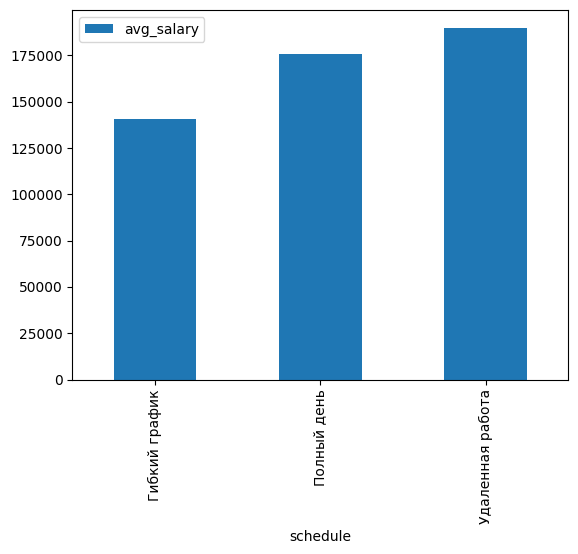

In [43]:
#Визуализация
df_0.plot(x="schedule", y="avg_salary", kind="bar")

Вывод:

Больше всего заработную плату получают сотрудники работающие удаленно, это скорее всего следсвие, того что предприниматели тратят меньше средств на содержание офиса и оборудования.  